# 1.1 - Intro Unsupervised Learning

**Ejemplos:** (Cuando no hay etiquetas)

+ Segmentación de clientes
+ Segmentación de productos
+ One-person segment (lo que funciona bien en un grupo no funciona necesariamente en otro)
+ Agrupación según características

**Escenario**

Cada elemento (usuario, cliente, producto..) puede ser considerado un vector. Dado un paquete de vectores se distribuyen por clusters. Vectores similares estarán en el mismo cluster, y clusters similares estarán más 'cerca' entre si que los que son más diferentes.

Todo éste proceder asume la existencia de una métrica de distancia, así se puede medir dicha distancia entre vectores dentro del espacio vectorial.

**Pasos para aplicar USL:**

+ **1**: Representación vectorial
+ **2**: Métrica, función de distancia
+ **3**: Medida de similitud

Cuando se crea un cluster, el vector en el centro del cluster (centroide) se considera el prototipo o el más representativo del cluster.


**Problemas tratables por USL:**

+ Segmentación de mercado
+ Detección de fraude en seguros o banca
+ Respuesta a tratamientos médicos
+ Detección de outliers

**Ejemplos de modelos:**

+ K-Means
+ Hierarchical Clustering
+ DBSCAN
+ HDBSCAN
+ GMM

# K-Means


El más viejo y el más popular. La idea es seleccionar previamente cuantos clusters se desean ($k$). Se seleccionan los puntos centrales del cluster (centroides) de manera aleatoria. Para cada nuevo registro se reasigna un cluster y se recalcula el centroide (media). Se itera el proceso hasta que no haya cambio en la clusterización.

![kmeans](images/kmeans.png)

![kmeans2](images/kmeans2.png)

In [1]:
import pylab as plt

import pandas as pd
import numpy as np

In [2]:
census=pd.read_csv('data/acs2015_county_data.csv')

census=census.dropna().drop(columns=['CensusId'])

census.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census.shape

(3218, 36)

In [4]:
# K-Means

from sklearn.cluster import KMeans

In [5]:
no_cols=['County', 'State']

cols=[c for c in census.columns if c not in no_cols]

In [6]:
kmeans=KMeans(n_clusters=4)

In [7]:
clusters=kmeans.fit(census[cols])

In [8]:
len(clusters.cluster_centers_)

4

In [9]:
preds=clusters.fit_predict(census[cols])

preds[10:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int32)

In [10]:
distancias=clusters.fit_transform(census[cols])

distancias[:3]

array([[1.08771054e+04, 3.69620918e+06, 1.43820788e+07, 9.96438206e+05],
       [2.20266455e+05, 3.48566101e+06, 1.41718751e+07, 7.85548290e+05],
       [3.68802066e+04, 3.73912400e+06, 1.44248665e+07, 1.03973082e+06]])

In [11]:
distancias[np.where(preds==1)[0]][:3]  # distancias cluster 1

array([[ 5809503.89979835,  2106406.00976323,  8588496.98197191,
         4804605.31745871],
       [ 4475286.97640161,   772570.30820241,  9917118.44212282,
         3470957.88908917],
       [ 3214056.93876303,   513144.88932824, 11180977.9607949 ,
         2211780.64503106]])

In [12]:
census['cluster']=preds

census.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
0,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0
1,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0
2,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0
3,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0
4,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0


In [13]:
census.cluster.value_counts()

0    3045
3     153
1      19
2       1
Name: cluster, dtype: int64

In [14]:
census[census.cluster==1].head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
103,Arizona,Maricopa,4018143,1986158,2031985,30.1,57.3,4.9,1.6,3.7,...,2.6,5.9,25.5,1821038,82.5,11.7,5.7,0.2,7.7,1
215,California,Orange,3116069,1539600,1576469,34.2,42.4,1.5,0.2,18.8,...,2.1,5.2,26.8,1508753,81.8,10.2,7.8,0.2,7.6,1
218,California,Riverside,2298032,1143477,1154555,47.0,37.8,5.9,0.4,6.0,...,1.6,5.2,32.4,920603,77.1,14.9,7.8,0.2,12.9,1
221,California,San Bernardino,2094769,1042053,1052716,51.1,31.2,8.1,0.4,6.5,...,1.2,4.2,30.4,829145,76.4,16.7,6.7,0.2,12.6,1
222,California,San Diego,3223096,1618945,1604151,32.9,47.0,4.7,0.4,11.2,...,2.0,6.8,25.0,1462130,77.3,14.8,7.7,0.2,8.7,1


In [15]:
census[census.cluster==0].head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
0,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0
1,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0
2,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0
3,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0
4,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0


In [16]:
census[census.cluster==3].State.value_counts()

California              15
Florida                 12
New Jersey              11
Pennsylvania             9
Massachusetts            8
Texas                    8
New York                 8
Ohio                     6
Maryland                 5
Colorado                 5
Washington               4
Illinois                 4
Georgia                  4
Michigan                 4
Connecticut              3
Minnesota                3
Tennessee                3
Oregon                   3
Virginia                 3
Wisconsin                3
North Carolina           3
Utah                     2
Missouri                 2
Kansas                   2
Louisiana                2
Indiana                  2
South Carolina           2
Oklahoma                 2
Alabama                  2
New Hampshire            1
Arkansas                 1
Idaho                    1
Nevada                   1
Iowa                     1
New Mexico               1
Rhode Island             1
Kentucky                 1
H

In [17]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3218 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            3218 non-null   object 
 1   County           3218 non-null   object 
 2   TotalPop         3218 non-null   int64  
 3   Men              3218 non-null   int64  
 4   Women            3218 non-null   int64  
 5   Hispanic         3218 non-null   float64
 6   White            3218 non-null   float64
 7   Black            3218 non-null   float64
 8   Native           3218 non-null   float64
 9   Asian            3218 non-null   float64
 10  Pacific          3218 non-null   float64
 11  Citizen          3218 non-null   int64  
 12  Income           3218 non-null   float64
 13  IncomeErr        3218 non-null   float64
 14  IncomePerCap     3218 non-null   int64  
 15  IncomePerCapErr  3218 non-null   int64  
 16  Poverty          3218 non-null   float64
 17  ChildPoverty  

In [18]:
census.groupby(['cluster'])['Income'].mean()  # media de ingreso por cluster

cluster
0    45264.092282
1    58589.894737
2    56196.000000
3    61615.901961
Name: Income, dtype: float64

In [19]:
census.groupby(['cluster'])['TotalPop'].mean()  # media de poblacion por cluster

cluster
0    4.916362e+04
1    2.594971e+06
2    1.003839e+07
3    7.258290e+05
Name: TotalPop, dtype: float64

In [20]:
census.groupby(['cluster'])['SelfEmployed'].mean()  # media de autoempleo por cluster

cluster
0    8.067816
1    6.284211
2    9.400000
3    5.441830
Name: SelfEmployed, dtype: float64

In [21]:
census.groupby(['cluster'])['Employed'].mean()  # media de empleo por cluster

cluster
0    2.175875e+04
1    1.205076e+06
2    4.635465e+06
3    3.465601e+05
Name: Employed, dtype: float64

In [22]:
census[census.cluster==2]

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
204,California,Los Angeles,10038388,4945351,5093037,48.2,26.9,8.0,0.2,14.0,...,2.3,5.1,30.0,4635465,79.0,11.5,9.4,0.2,10.0,2


##### plot 2D K-Means

In [52]:
np.random.seed(4)

a=np.random.multivariate_normal([10,20], [[3,1], [1,4]], size=[100,])
b=np.random.multivariate_normal([0,20], [[3,1], [1,4]], size=[50,])

In [53]:
X=np.concatenate((a,b),)
X.shape

(150, 2)

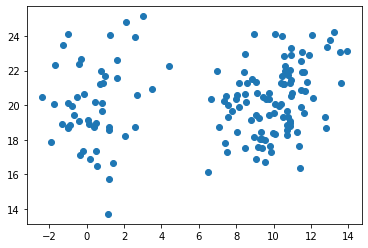

In [54]:
plt.scatter(X[:,0], X[:,1])
plt.show();

In [61]:
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit(X)

In [62]:
clusters

KMeans(n_clusters=5)

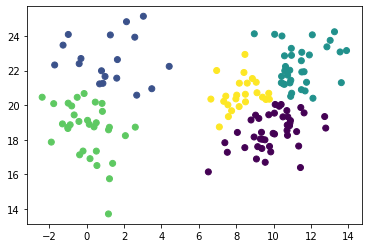

In [63]:
plt.scatter(X[:,0], X[:,1], c=clusters.fit_predict(X))
plt.show();

# Hierarchical Clustering (Dendrograma)

La mejora sobre K-Means es fundamentalmente que no hay que asumir el número de clusters.

Hay dos maneras de atacar éste problema:

+ Por aglomeración
+ Por división

**Aglomeración:**

Se empieza asumiendo que cada registro es un cluster individual y se van combinando aquellos similares hasta conseguir un solo cluster, la población entera. Después se decide el número óptimo de clusters según la distancia.


**División:**

El proceso inverso. Se comienza con un solo cluster y se va dividiendo hasta tener el número óptimo de clusters (según distancia).


![hca](images/hca.png)

##### Medidas de distancia

Aquí también entra la distancia, para medir entre registros/clusters. Normalmente, se usa la distancia euclídea. El uso de la métrica de distancia depende del problema en cuestión, por ejemplo, en una clusterización de lugares en la ciudad, podría ser mejor usar $cityblock$, o incluso tomar el tiempo que hay entre dos lugares (tiempo como métrica de distancia).

##### Criterios de conexión (linkage criteria)

Después de seleccionar la métrica de distancia, hay que decidir de qué manera se conectan los registros al cluster. Puede ser:

+ Single-linkage: conexión entre los puntos más parecidos del cluster.
+ Complete-linkage: conexión entre los puntos menos parecidos del cluster.
+ Average-linkage: conexión entre los centroides del cluster.


![link](images/link.png)

Al igual que la métrica de distancia, la elección del criterio de conexión ha de basarse en el propio problema. Por ejemplo, para clasificar varias tecnologías diferentes tendría sentido basarse en cuales son más parecidos. Si no existen justificaciones claras de cual usar, se suele usar el criterio de Ward, que viene a ser mínimos cuadrados de las distancias, respecto de la media del cluster. Esto concuerda con el concepto de distancia entre grupos en estadística (ANOVA, MANOVA....)

https://es.wikipedia.org/wiki/M%C3%A9todo_de_Ward

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [70]:
#help(linkage)

In [71]:
# matriz de conexion

Z=linkage(X, 'ward')

Z.shape

(149, 4)

In [72]:
Z[0]  # idx1, idx2, distancia, sample_count

array([ 5.        , 51.        ,  0.06014112,  2.        ])

In [73]:
Z[3]

array([49.        , 95.        ,  0.10390879,  2.        ])

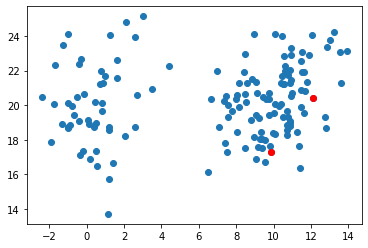

In [74]:
idxs=[17, 63]

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[idxs, 0], X[idxs, 1], c='r');

##### dendrograma

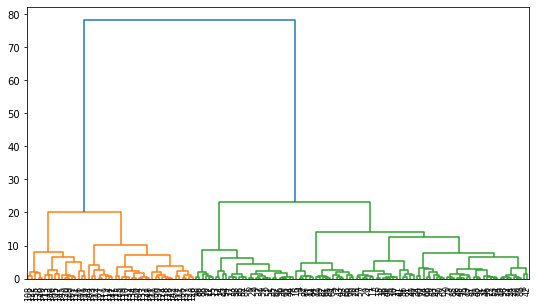

In [75]:
plt.figure(figsize=(9, 5))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.);

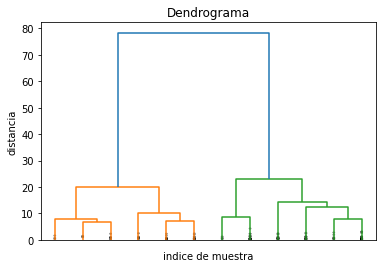

In [76]:
dendrogram(Z, 
           truncate_mode='lastp', 
           p=12,
           leaf_rotation=90., 
           leaf_font_size=8.,
           show_contracted=True, 
           show_leaf_counts=False)

plt.title('Dendrograma')
plt.xlabel('indice de muestra')
plt.ylabel('distancia')

plt.show();

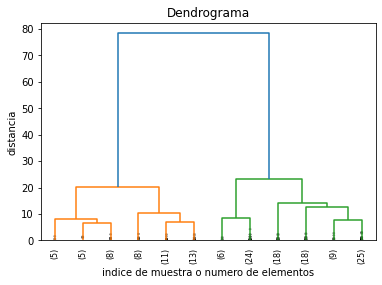

In [77]:
dendrogram(Z, 
           truncate_mode='lastp', 
           p=12,
           leaf_rotation=90., 
           leaf_font_size=8.,
           show_contracted=True, 
           show_leaf_counts=True)


plt.title('Dendrograma')
plt.xlabel('indice de muestra o numero de elementos')
plt.ylabel('distancia')

plt.show();

In [78]:
def fancy_dendro(*args, **kwargs):
    max_d=kwargs.pop('max_d', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']=max_d
        
    annotate_above=kwargs.pop('annotate_above', None)
    
    ddata=dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Dendrograma')
        plt.xlabel('Indice de muestra o (tamaño del cluster)')
        plt.ylabel('Distancia')
        
        for i,d,c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x=0.5*sum(i[1:3])
            y=d[1]
            
            if y>annotate_above:
                plt.plot(x,y,'o', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),textcoords='offset points', va='top', ha='center')
                
        if max_d:
            plt.axhline(y=max_d, c='k')
    
    return ddata
    
    

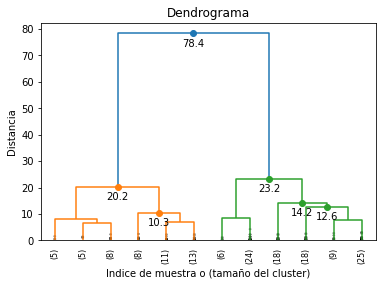

In [79]:
fancy_dendro(Z, truncate_mode='lastp', p=12,
                 leaf_rotation=90., leaf_font_size=8.,
                 show_contracted=True, annotate_above=10)

plt.show();

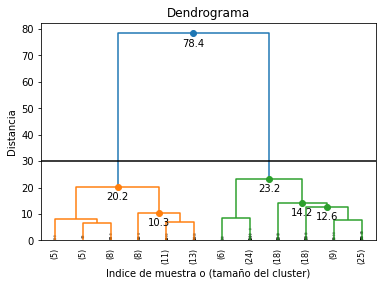

In [84]:
fancy_dendro(Z, 
             truncate_mode='lastp', 
             p=12,
             leaf_rotation=90., 
             leaf_font_size=8.,
             show_contracted=True, 
             annotate_above=10, 
             
             max_d=30) # con max_d es el umbral de decision del nº de cluster

plt.show();

##### obteniendo clusters

In [85]:
from scipy.cluster.hierarchy import fcluster

In [89]:
max_d=23

clusters=fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [90]:
# conociendo k...

k=2

clusters=fcluster(Z, k, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

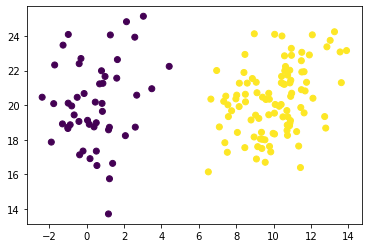

In [91]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show();

# K-Means VS Hierarchical

In [92]:
from sklearn.datasets import make_moons

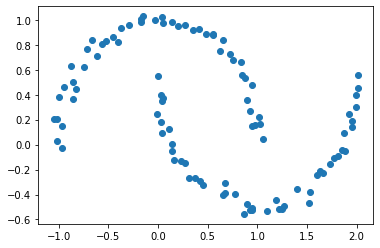

In [98]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)[0]

plt.scatter(moons[:, 0], moons[:, 1]);

In [99]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AC

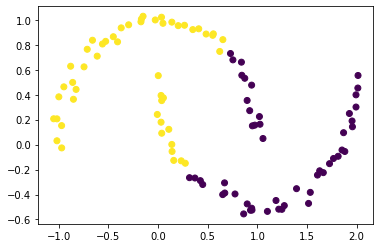

In [100]:
cluster=KMeans(n_clusters=2).fit(moons)

plt.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_);

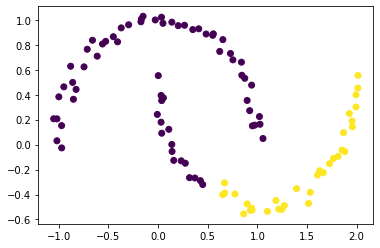

In [101]:
cluster=AC().fit(moons) # 2 clusters, ward for defecto

plt.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_);

In [104]:
#help(AC())

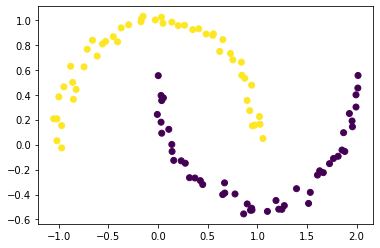

In [105]:
cluster=AC(linkage='single').fit(moons) 

plt.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_);

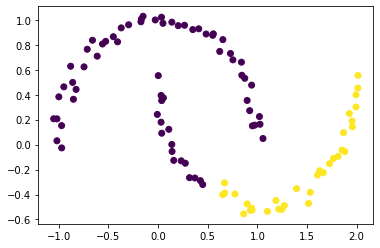

In [106]:
cluster=AC(linkage='average').fit(moons) 

plt.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_);

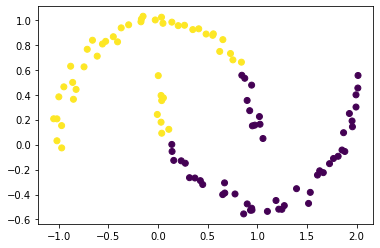

In [107]:
cluster=AC(linkage='complete').fit(moons) 

plt.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_);